In [56]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import decode_predictions,preprocess_input
import numpy as np 
import keras

### Loading Resnet50 and using imagenet weights as it is

In [8]:
model = ResNet50(weights='imagenet')

In [9]:
img_path = 'pexels-pixabay-461064.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x

array([[[[ 65.061    ,  63.221    ,  64.32     ],
         [ 65.061    ,  64.221    ,  61.32     ],
         [ 74.061    ,  69.221    ,  69.32     ],
         ...,
         [ 31.060997 ,  25.221    ,  21.32     ],
         [ 19.060997 ,  11.221001 ,  13.32     ],
         [ 11.060997 ,   3.2210007,   5.3199997]],

        [[ 70.061    ,  69.221    ,  68.32     ],
         [ 65.061    ,  64.221    ,  63.32     ],
         [ 57.060997 ,  54.221    ,  54.32     ],
         ...,
         [  7.060997 ,   2.2210007,   2.3199997],
         [ 26.060997 ,  24.221    ,  25.32     ],
         [ 28.060997 ,  25.221    ,  25.32     ]],

        [[ 65.061    ,  61.221    ,  57.32     ],
         [ 62.060997 ,  60.221    ,  57.32     ],
         [ 70.061    ,  66.221    ,  63.32     ],
         ...,
         [  5.060997 ,   1.2210007,   3.3199997],
         [ 13.060997 ,  11.221001 ,  12.32     ],
         [ 11.060997 ,  10.221001 ,   7.3199997]],

        ...,

        [[ 86.061    ,  79.221    ,  8

In [10]:
pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [11]:
decode_predictions(pred,top=5)

[[('n03832673', 'notebook', 0.37039545),
  ('n03642806', 'laptop', 0.08327617),
  ('n06359193', 'web_site', 0.040210165),
  ('n03223299', 'doormat', 0.038036287),
  ('n03085013', 'computer_keyboard', 0.03181153)]]

### Using PIL to open image and then perform predictions using pre_trained model
- Using png image

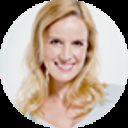

In [55]:
from PIL import Image
# image = Image.open('Images/testi_02.png')
image = Image.open('Images/testi_03.png')

image  = image.resize((128,128))

image = image.convert('RGB')

image
# x = np.expand_dims(image,axis=0)
# y = preprocess_input(x)

In [53]:
predict = model.predict(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


In [54]:
decode_predictions(predict,top=3)

[[('n03866082', 'overskirt', 0.23601188),
  ('n03534580', 'hoopskirt', 0.16940777),
  ('n03476991', 'hair_spray', 0.12241123)]]

### Importing VGG19 and checking its performace

In [57]:
obj_model = VGG19(weights='imagenet')

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 174s 0us/step


In [58]:
obj_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
from tensorflow.keras.applications.vgg19 import preprocess_input,decode_predictions

In [72]:
detection_img = Image.open('pexels-pixabay-461064.jpg')
detect = detection_img.resize((224,224))

np.array(detect)
inp = np.expand_dims(detect,axis=0)
input = preprocess_input(inp)

In [74]:
obj_pred = obj_model.predict(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [87]:
predicted_labels = decode_predictions(obj_pred,top=3)[0]

In [88]:
import matplotlib.pyplot as plt

# plt.imshow(img)
# plt.axis('off')
for i, (imagenet_id, label, prob) in enumerate(predicted_labels):
    prob = float(prob)
    plt.text(10, 20 + i * 20, f'{label}: {prob:.2f}', color='white', fontsize=12, backgroundcolor='black')

plt.show()